In [1]:
# %load basic.py
from IPython.display import set_matplotlib_formats, display
import numpy as np
import pandas as pd
import mglearn
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
from cycler import cycler

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/H2GTRM.TTF").get_name()
rc('font', family = font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))


np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

__all__ = ['np', 'mglearn', 'display', 'plt', 'pd']

C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\hyooo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# %load import_set3.py
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs


from sklearn.model_selection import train_test_split


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

# 3.4 차원 축소, 특성 추출, 매니폴드 학습

## 3.4.1 주성분 분석(PCA)

주성분 분석은 특성들이 통계적으로 상관관계가 없도록 dataset을 회전시키는 기술입니다.

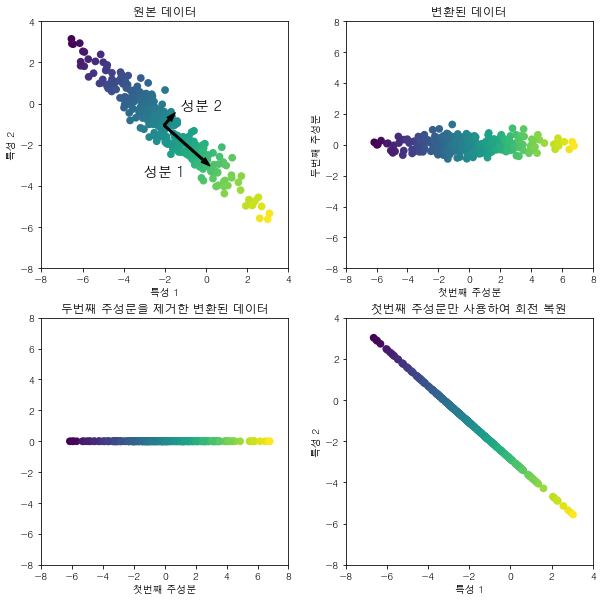

In [3]:
mglearn.plots.plot_pca_illustration()

1. 첫 번째 그래프는 원본 데이터 포인트를 색으로 구분해 표시한 것입니다.
    - '성분 1'이라고 쓰여 있는 분산이 가장 큰 방향을 찾습니다.  
      이 방향은 데이터에서 가장 많은 정보를 담고 있는 방향(특성들의 상관관계가 가장 큰 방향)입니다.  
    - 그 다음으로 첫 번째 방향과 직각인 방향 중 가장 많은 정보를 담은 방향을 찾습니다.  
    
-> 이런 과정을 거쳐 찾은 방향을 데이터에 있는 주된 분산의 방향이라고 해서 주성분이라고 합니다.  
    (일반적으로 원본 특성 갯수만큼의 주성분이 있습니다.)  

2. 두 번째 그래프는 같은 데이터지만 주성분 1과 2를 각각 x축과 y축에 나란하도록 회전한 것입니다.  
    - 회전하기 전에 데이터에서 평균을 빼서 중심을 원점에 맞췄습니다.  
    - PCA에 의해 회전된 두 축은 연관되어 있지 않으므로 변환된 데이터의 상관관계 행렬이 대각선 방향을 제외하고는 0이 됩니다.  
3. 세 번째 그래프는 주성분의 일부만 남기는 차원 축소 용도로 PCA를 사용했습니다.
    - 2차원 dataset에서 1차원 dataset으로 차원이 감소합니다.  
    (가장 유용한 방향을 찾아서 그 방향의 성분은 유지하는 것입니다.)  
4. 네 번째 그래프는 데이터에 다시 평균을 더하고 반대로 회전시킵니다.
    - 원래 특성 공간에서 첫 번째 주성분의 정보만 담고 있습니다.

### PCA를 적용해 유방암 dataset 시각화하기

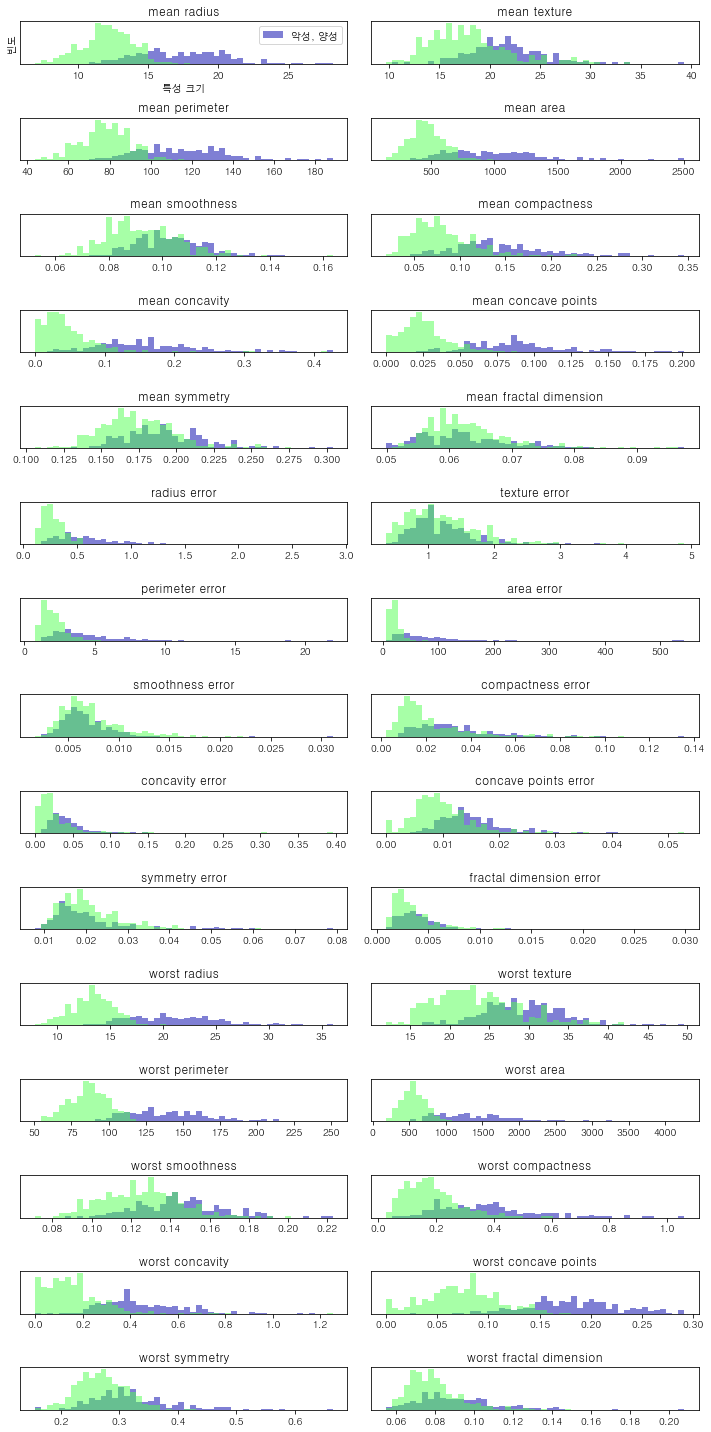

In [4]:
cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize = (10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins = 50)
    ax[i].hist(malignant[:, i], bins = bins, color = mglearn.cm3(0), alpha = .5)
    ax[i].hist(benign[:, i], bins = bins, color = mglearn.cm3(2), alpha = .5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('특성 크기')
ax[0].set_ylabel('빈도')
ax[0].legend(['악성, 양성'], loc = 'best')
fig.tight_layout();

초록색은 양성 클래스, 푸른색은 악성 클래스를 나타냅니다.

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [6]:
from sklearn.decomposition import PCA

# 데이터의 처음 두 개 주성분만 유지시킵니다.
pca = PCA(n_components = 2)

# 유방암 데이터로 PCA 모델을 만듭니다.
pca.fit(X_scaled)

# 처음 두 개의 주성분을 사용해 데이터를 변환합니다.
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태 :", str(X_scaled.shape))
print("축소된 데이터 형태 :", str(X_pca.shape))

원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 2)


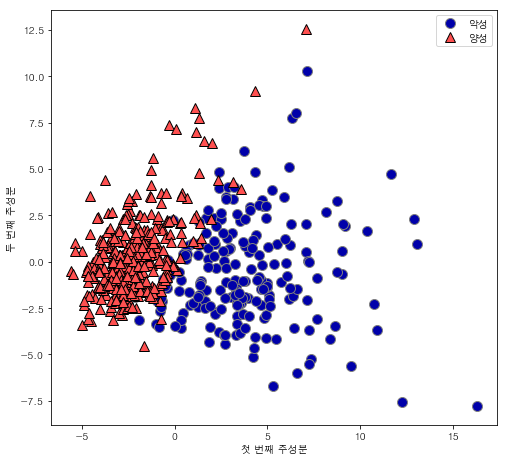

In [7]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize = (8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(['악성', '양성'], loc = 'best')
plt.gca().set_aspect('equal')
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분');

**PCA의 단점**은 그래프의 두 축을 해석하기가 쉽지 않다는 점입니다.  
주성분은 원본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태입니다.  
PCA 객체가 학습될 때 components_ 속성에 주성분이 저장됩니다.

In [8]:
print(" PCA 주성분 형태 :", pca.components_.shape)

 PCA 주성분 형태 : (2, 30)


In [9]:
print(" PCA 주성분 :\n", pca.components_)

 PCA 주성분 :
 [[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.17   0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.21   0.229  0.251  0.123  0.132]
 [-0.234 -0.06  -0.215 -0.231  0.186  0.152  0.06  -0.035  0.19   0.367
  -0.106  0.09  -0.089 -0.152  0.204  0.233  0.197  0.13   0.184  0.28
  -0.22  -0.045 -0.2   -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]]


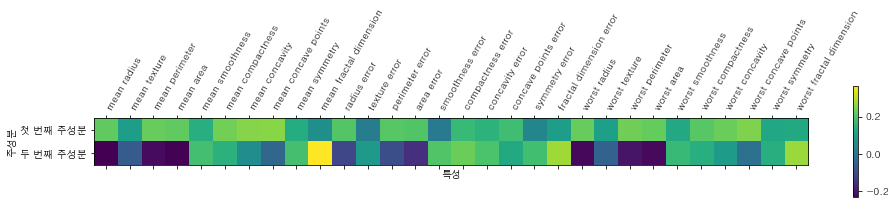

In [10]:
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0, 1], ['첫 번째 주성분', '두 번째 주성분'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation = 60, ha = 'left')
plt.xlabel('특성')
plt.ylabel('주성분');

### 고유얼굴(eigenface) 특성 추출

PCA를 이용하여 LFW dataset의 얼굴 이미지에서 특성을 추출하는 간단한 어플리케이션

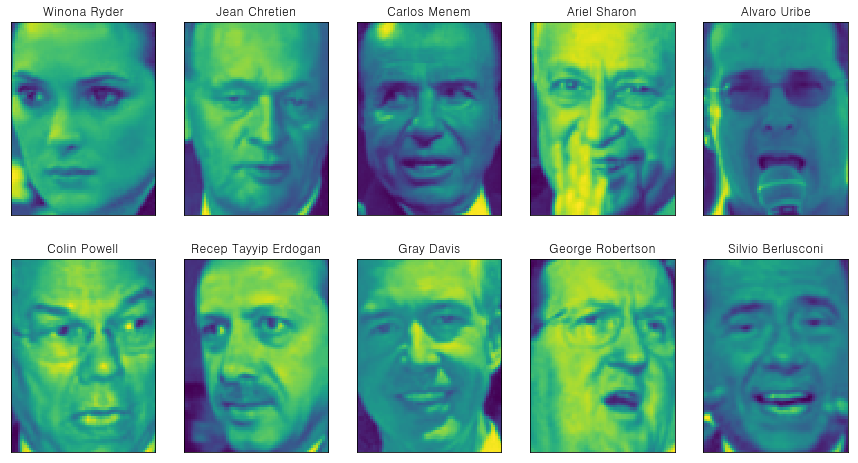

In [11]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize = (15, 8), subplot_kw = {'xticks' : (), 'yticks' : ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target]);

LFW dataset에는 62명의 얼굴을 찍은 이미지가 총 3,023개가 있으며 각 이미지의 크기는 87x65픽셀입니다.

In [12]:
print("people.images.shape :", people.images.shape)
print("클래스 갯수 :", len(people.target_names))

people.images.shape : (3023, 87, 65)
클래스 갯수 : 62


In [13]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)

# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25}{1:#3}".format(name, count), end = '    ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo          39    Alvaro Uribe              35    Amelie Mauresmo           21    
Andre Agassi              36    Angelina Jolie            20    Ariel Sharon              77    
Arnold Schwarzenegger     42    Atal Bihari Vajpayee      24    Bill Clinton              29    
Carlos Menem              21    Colin Powell             236    David Beckham             31    
Donald Rumsfeld          121    George Robertson          22    George W Bush            530    
Gerhard Schroeder        109    Gloria Macapagal Arroyo   44    Gray Davis                26    
Guillermo Coria           30    Hamid Karzai              22    Hans Blix                 39    
Hugo Chavez               71    Igor Ivanov               20    Jack Straw                28    
Jacques Chirac            52    Jean Chretien             55    Jennifer Aniston          21    
Jennifer Capriati         42    Jennifer Lopez            21    Jeremy Greenstock         24    
Jiang Zemin               20  

데이터의 편중을 없애기 위해 사람마다 50개의 이미지만 선택

In [14]:
mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정합니다.
# MinMaxScaler를 적용하는 것과 거의 같습니다.
X_people = X_people / 255.

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state = 0)

# 이웃의 갯수를 한 개로 하여 KNeighborsClassifier 모델을 만듭니다.
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수 : {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수 : 0.23


PCA의 화이트닝 옵션을 사용해서 주성분의 스케일이 같아지도록 조정합니다.  
(화이트닝 옵션 없이 변환한 후에 StandardScaler 를 적용하는 것과 같읍)

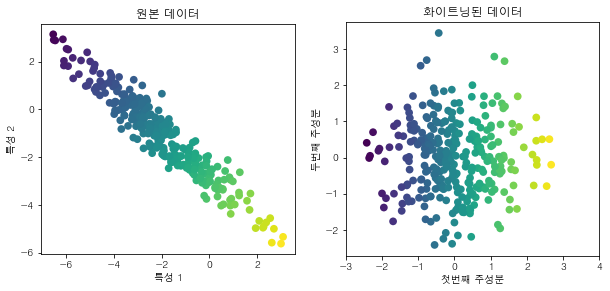

In [16]:
mglearn.plots.plot_pca_whitening()

In [17]:
pca = PCA(n_components = 100, whiten = True, random_state = 0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape :", X_train_pca.shape)

X_train_pca.shape : (1547, 100)


In [18]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도 : {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 세트 정확도 : 0.31


In [19]:
print("pca.components_.shape :", pca.components_.shape)

pca.components_.shape : (100, 5655)


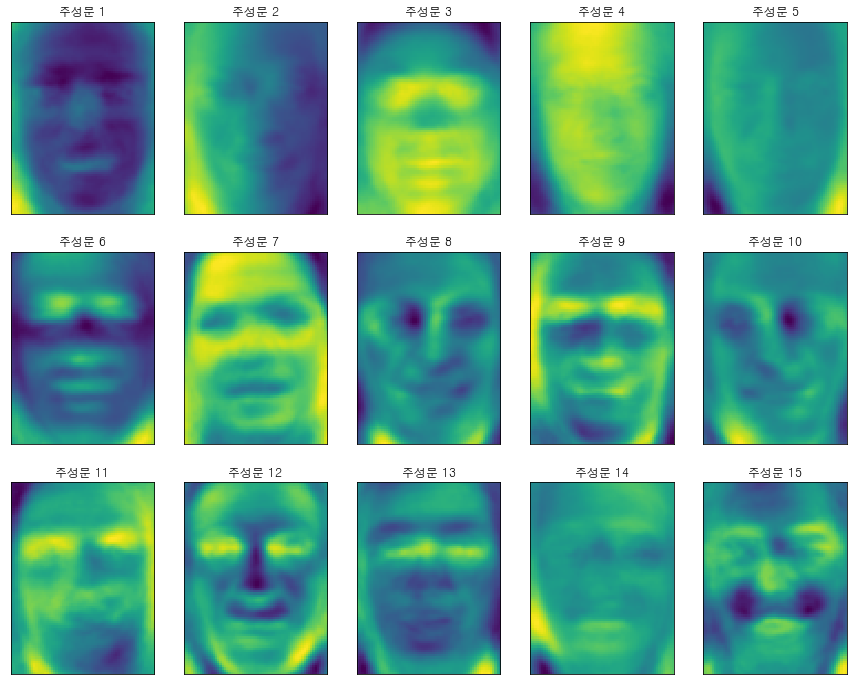

In [20]:
fig, axes = plt.subplots(3, 5, figsize = (15, 12), subplot_kw = {'xticks' : (), 'yticks' : ()})
for i, (component, ax)in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap = 'viridis')
    ax.set_title('주성분 {}'.format((i + 1)));

첫 번째 주성분은 얼굴과 배경의 명암 차이를 기록한 것으로 보이고, 두 번째 주성분은 오른쪽과 왼쪽의 조명의 차이를 담고 있는 것 등  
몇몇 주성분이 잡아낸 얼굴 이미지의 특징을 짐작해볼 수 있습니다.

몇 개의 주성분으로 데이터를 줄이고 원래 특성 공간으로 되돌리는 작업은 inverse_transform 메서드를 사용합니다.

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 7.4s, 0.1min


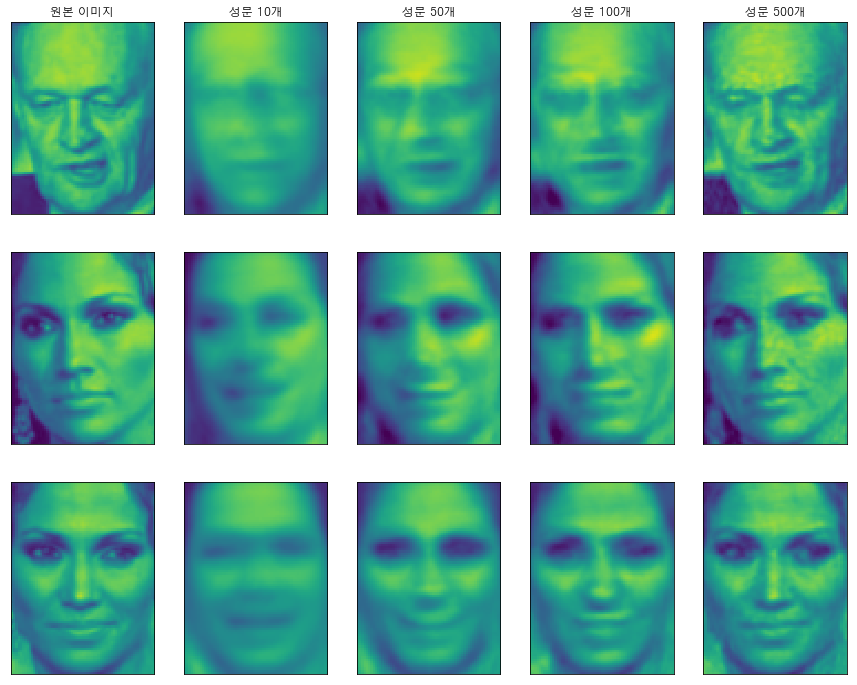

In [21]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

PCA의 처음 두 주성분을 이용해 전체 데이터를 누구의 얼굴인지 클래스로 구분해 산점도로 나타냈습니다.

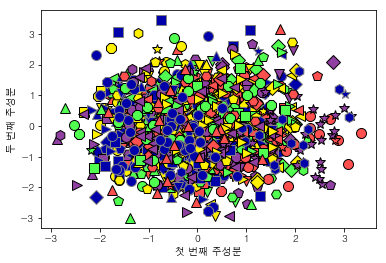

In [22]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분');